In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import interp1d


import matplotlib.pyplot as plt

import os
import sys
import logging

#### Load anndata


In [2]:
# data directory and files for pre-prared anndata
data_dir = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/perturb_seq'
adata_file = '240401_merged.h5ad'

In [3]:
adata_tfperturb = sc.read_h5ad(os.path.join(data_dir, adata_file))
adata_tfperturb

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'tota

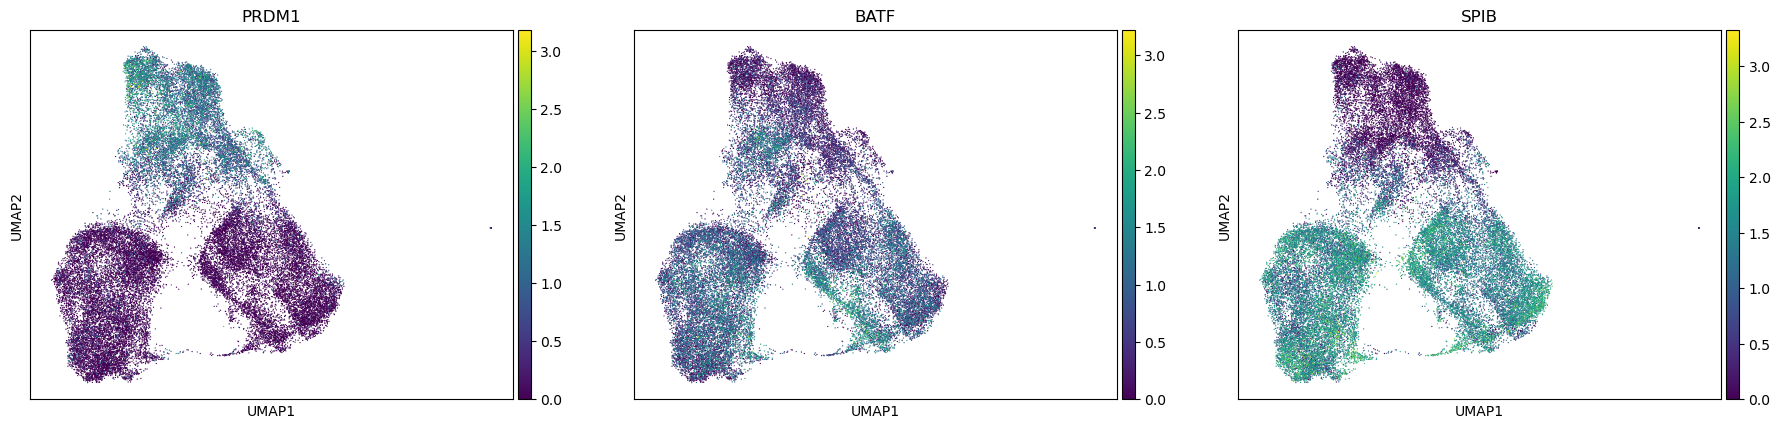

In [13]:
sc.pl.umap(adata_tfperturb, color=['PRDM1','BATF','SPIB'],legend_loc='on data')

/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


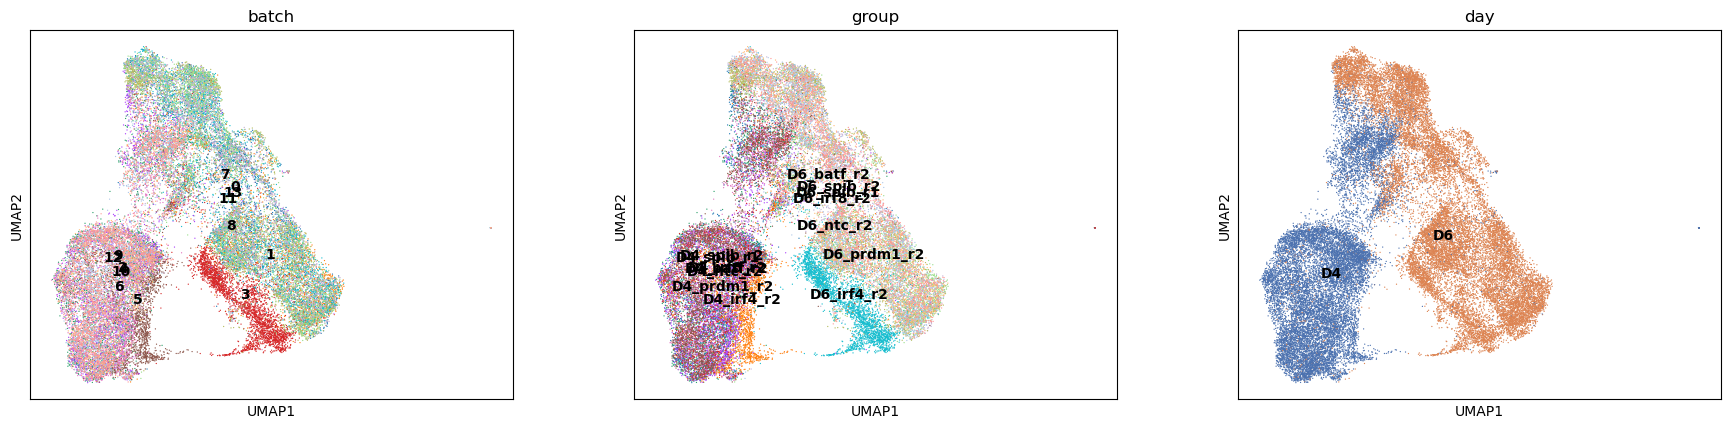

In [42]:
sc.pl.umap(adata_tfperturb, color=['batch', 'group', 'day'], legend_loc='on data')

/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


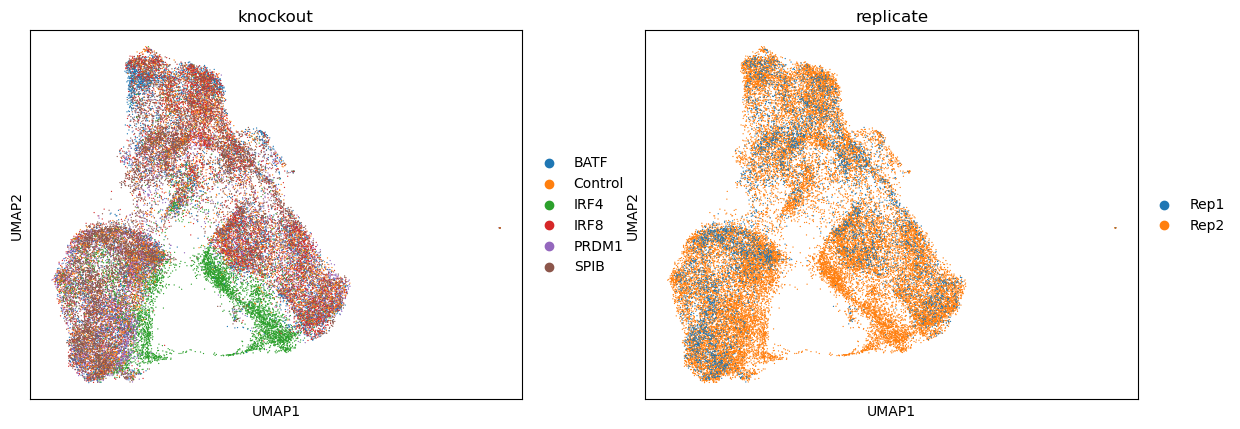

In [4]:
sc.pl.umap(adata_tfperturb, color=['knockout', 'replicate'])

In [15]:
## split the anndata into day4 and day6 samples
adata_day4 = adata_tfperturb[adata_tfperturb.obs['day']=='D4']

#subset day4 anndata into 'knockout' specific cells to plot for umap
adata_day4_spib = adata_day4[adata_day4.obs['knockout']=='SPIB'] # 5371 cells
adata_day4_irf8 = adata_day4[adata_day4.obs['knockout']=='IRF8'] # 2695 cells
adata_day4_prdm1 = adata_day4[adata_day4.obs['knockout']=='PRDM1'] # 2448 cells
adata_day4_irf4 = adata_day4[adata_day4.obs['knockout']=='IRF4'] # 2241 cells
adata_day4_batf = adata_day4[adata_day4.obs['knockout']=='BATF'] # 2000 cells

In [31]:
adata_day4_batf

View of AnnData object with n_obs × n_vars = 2000 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts'

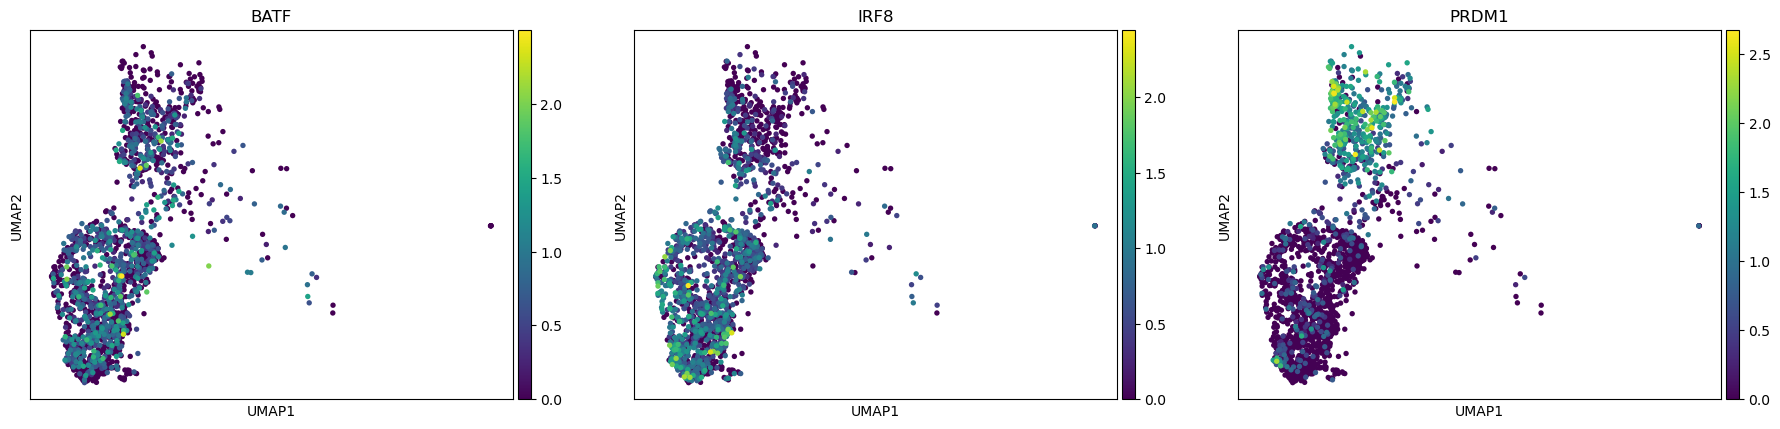

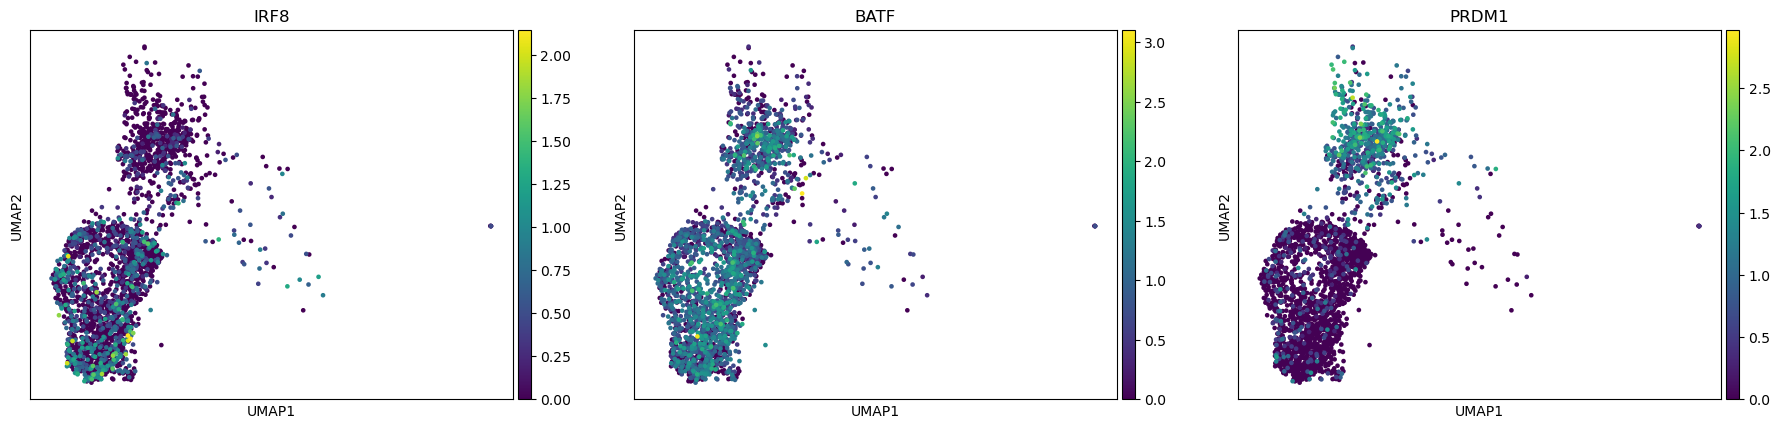

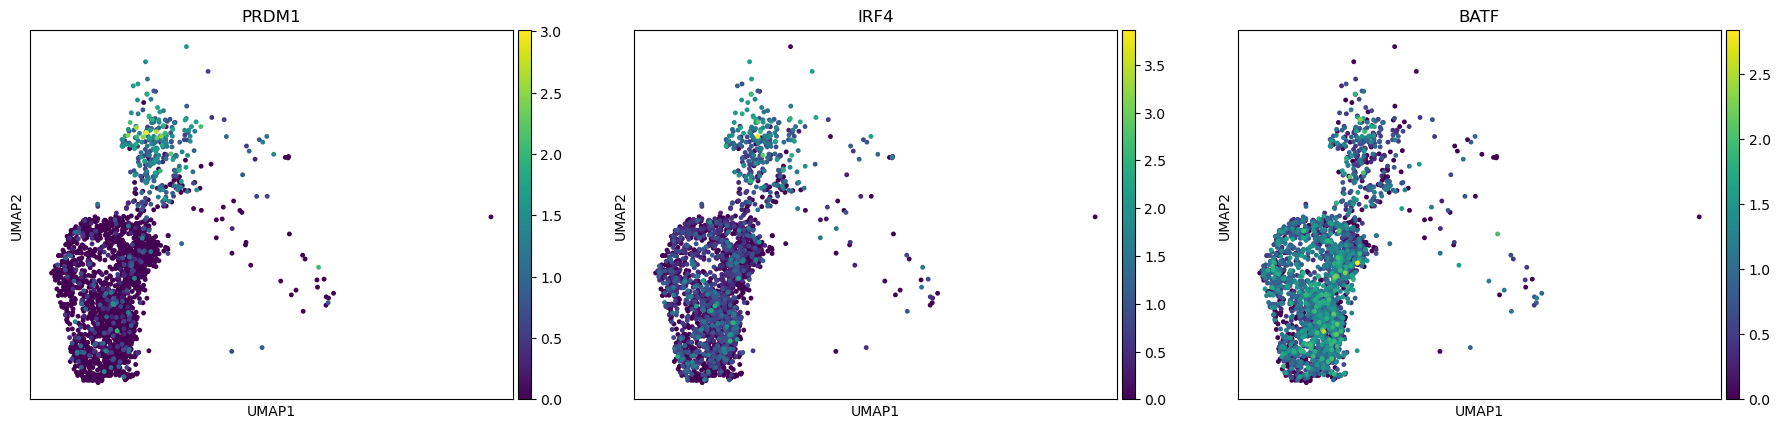

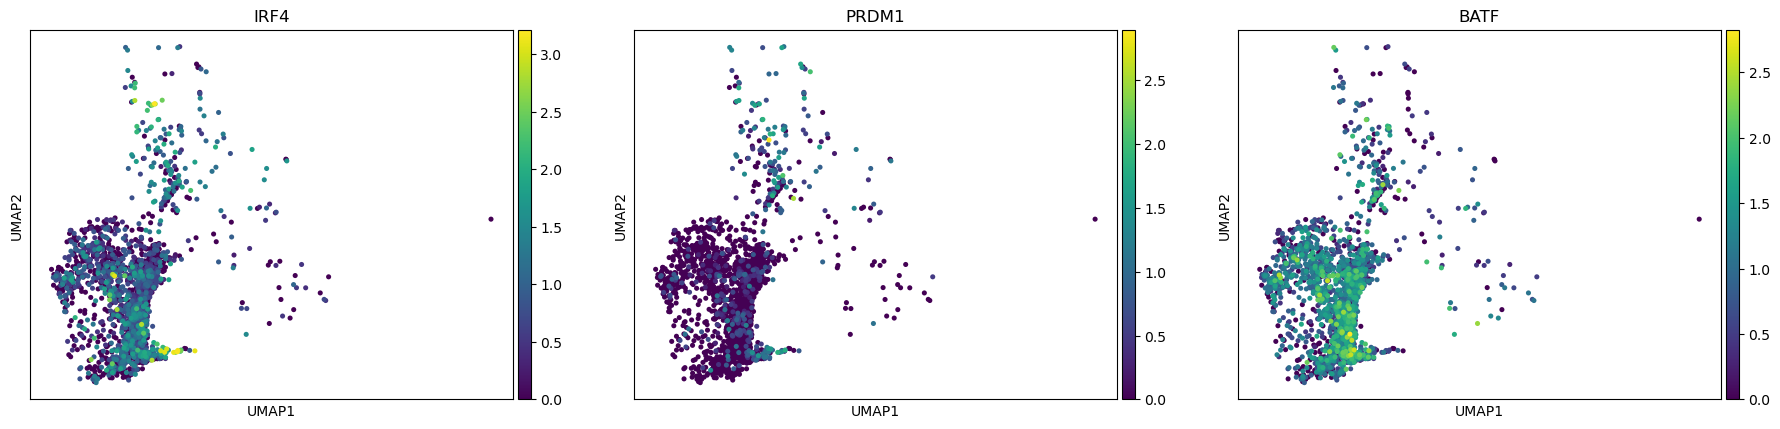

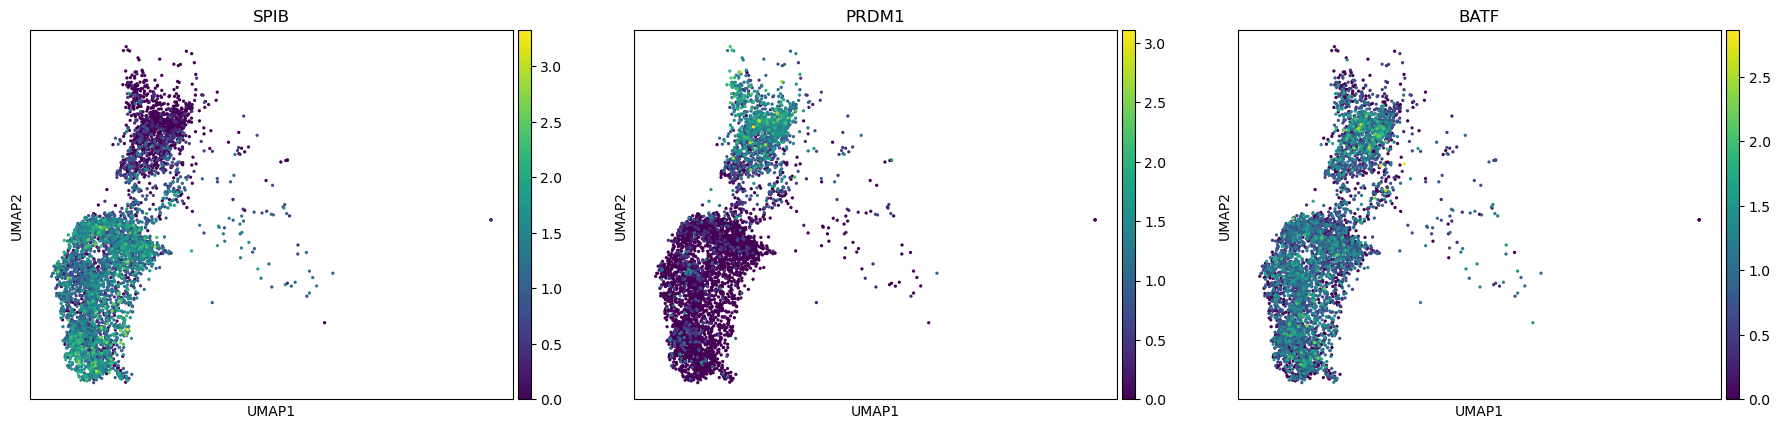

In [34]:
#plot umaps for day4 specific knockouts

sc.pl.umap(adata_day4_batf, color=['BATF', 'IRF8', 'PRDM1'],legend_loc='on data')
sc.pl.umap(adata_day4_irf8, color=['IRF8', 'BATF', 'PRDM1'],legend_loc='on data')
sc.pl.umap(adata_day4_prdm1, color=['PRDM1', 'IRF4', 'BATF'],legend_loc='on data')
sc.pl.umap(adata_day4_irf4, color=['IRF4', 'PRDM1', 'BATF'],legend_loc='on data')
sc.pl.umap(adata_day4_spib, color=['SPIB', 'PRDM1', 'BATF'],legend_loc='on data')


In [35]:
adata_day6 = adata_tfperturb[adata_tfperturb.obs['day']=='D6']

#subset day6 anndata into 'knockout' specific cells to plot for umap
adata_day6_spib = adata_day6[adata_day6.obs['knockout']=='SPIB'] # 5014 cells
adata_day6_irf8 = adata_day6[adata_day6.obs['knockout']=='IRF8'] # 3157 cells
adata_day6_prdm1 = adata_day6[adata_day6.obs['knockout']=='PRDM1'] # 2124 cells
adata_day6_irf4 = adata_day6[adata_day6.obs['knockout']=='IRF4'] # 3402 cells
adata_day6_batf = adata_day6[adata_day6.obs['knockout']=='BATF'] # 3142 cells

In [40]:
adata_day6_prdm1

View of AnnData object with n_obs × n_vars = 2124 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts'

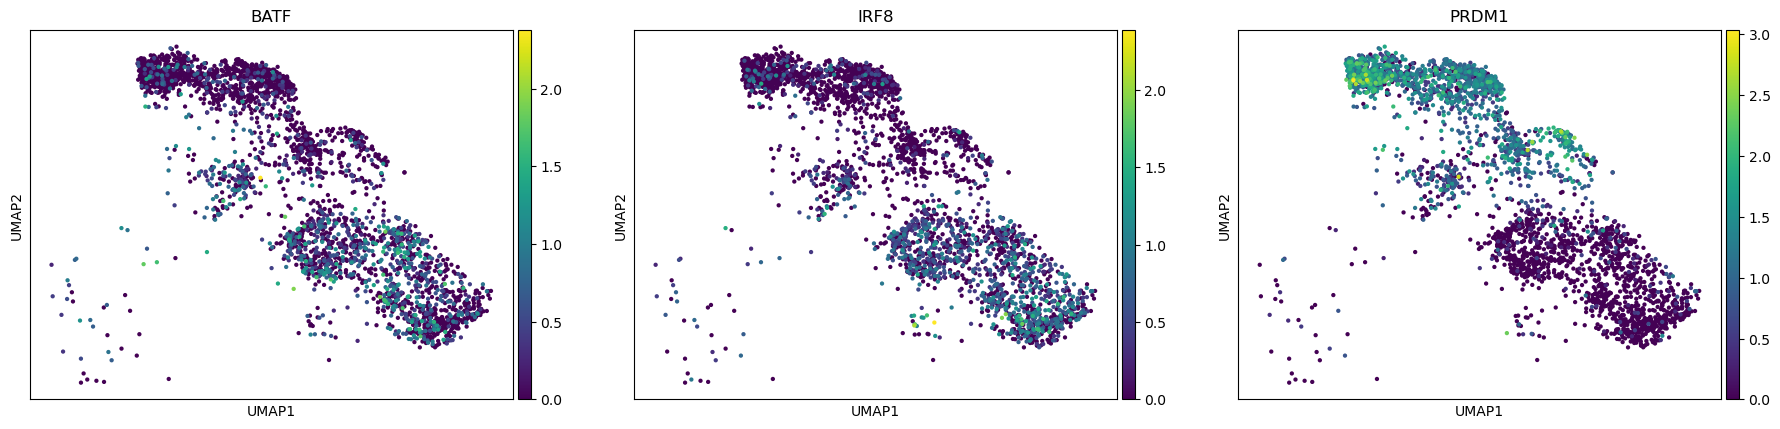

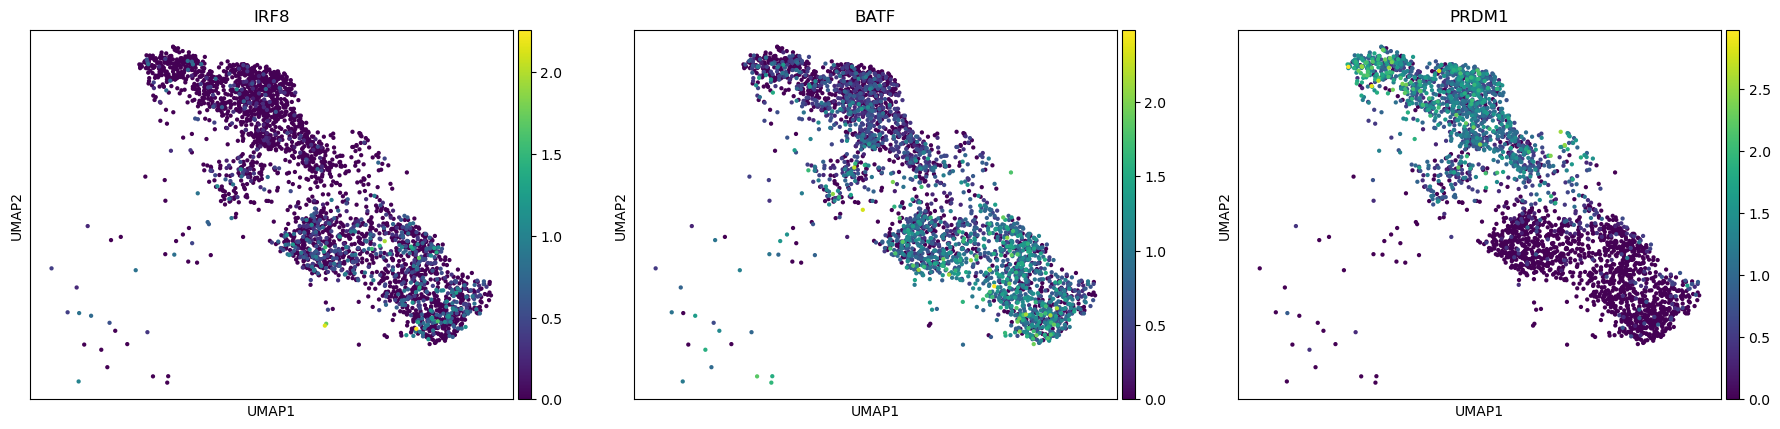

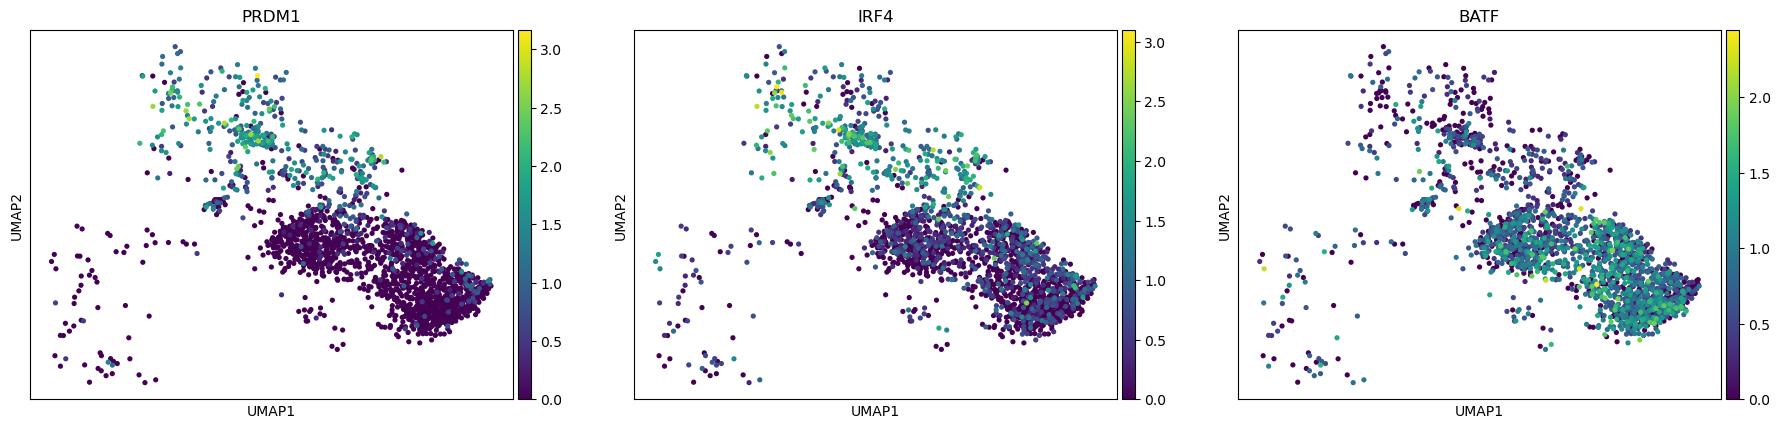

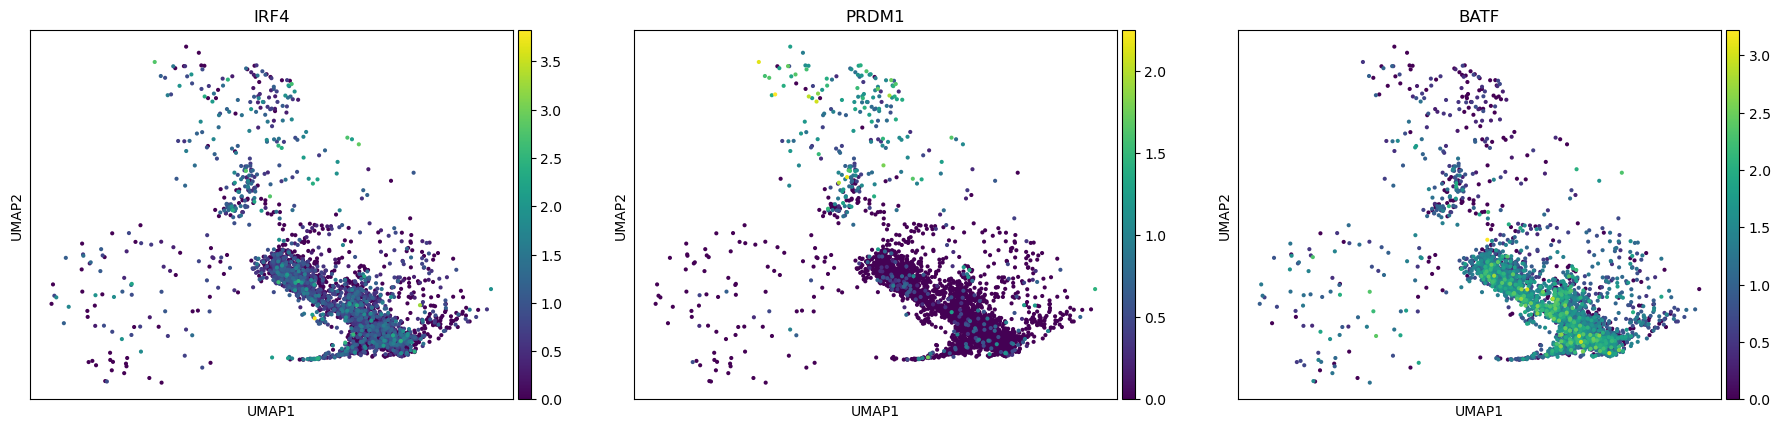

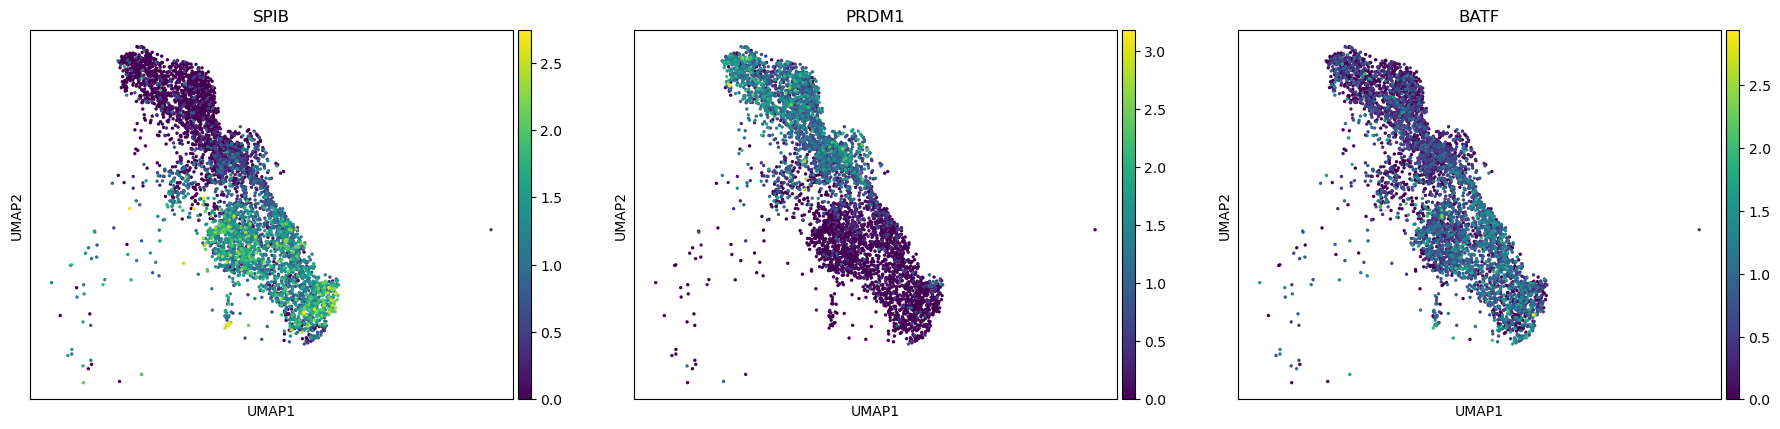

In [41]:
# plot umaps for day6 specific knockouts
sc.pl.umap(adata_day6_batf, color=['BATF', 'IRF8', 'PRDM1'],legend_loc='on data')
sc.pl.umap(adata_day6_irf8, color=['IRF8', 'BATF', 'PRDM1'],legend_loc='on data')
sc.pl.umap(adata_day6_prdm1, color=['PRDM1', 'IRF4', 'BATF'],legend_loc='on data')
sc.pl.umap(adata_day6_irf4, color=['IRF4', 'PRDM1', 'BATF'],legend_loc='on data')
sc.pl.umap(adata_day6_spib, color=['SPIB', 'PRDM1', 'BATF'],legend_loc='on data')